# SGD Algorithm to predict movie ratings

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. the data will be of this formate, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>
<h3>task 1: Predict the rating for a given (user_id, movie_id) pair</h3>
</pre>
<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>
then the predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as


$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

### TASK: 1
__SGD Algorithm to minimize the loss__
1. for each unique user initilize a bias value $B_{i}$ randomly, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user

2. for each unique movie initilize a bias value $C_{j}$ randomly, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie

3. Construct adjacency matrix with the given data, assumeing its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie
<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>
you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

4. we will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

5. So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

6. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie

7. $\mu$ represents the mean of all the rating given in the dataset
</pre>

<br>8.
<code>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
    predict the ratings with formula </code> $\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j)$
    <code>
    print the mean squared error with predicted ratings
    </code>

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>

10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 
### TASK: 2

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

In [2]:
# Loading the data
import pandas as pd
data = pd.read_csv('ratings_train.csv')
data.shape

(89992, 3)

In [3]:
# Visualizing the ratings given by the users
data.head(14)

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5
5,235,727,5
6,285,266,4
7,451,513,4
8,436,661,5
9,101,648,3


In [4]:
# Converting the user id, movie id and rating into lists
user_data=data.user_id.tolist()
item_data=data.item_id.tolist()
ratings=data.rating.tolist()

In [98]:
# Checking how many same pair of user and movie exists for user_id = 4 and item_id=228
a=0
from tqdm import tqdm
for i in tqdm(range(89992)): # here 89992 is the length of the data
    if data['user_id'][i]==4 and data['item_id'][i]==228:
        a+=1
print('number of pairs',a)        

100%|█████████████████████████████████| 89992/89992 [00:03<00:00, 28514.41it/s]


number of pairs 1


In [9]:
# checking the minimum user id value
min(data['user_id'])

0

In [10]:
# checking the maximum user id value
max(data['user_id'])

942

In [11]:
## checking the minimum movie id value
min(data['item_id'])

0

In [12]:
# checking the maximum movie id value
max(data['item_id'])

1680

In [13]:
# Converting the user id, movie id and rating into lists
l1=data['user_id']
l2=data['item_id']
l3=data['rating']

# Creating GRID of dimension 942*1680 for the ADJACENCY MATRIX

In [14]:
# Creating a grid 
#where row represents user id, column represents movie_id and values in the grid represent 'RATINGS'
Grid=[0]*943
for i in range(943):
    Grid[i]=[0]*1681

In [15]:
Grid[0][1680]

0

# The above grid output shows that user_id=0, does not give ratings to movie_id=1680

In [16]:
f=0
from tqdm import tqdm
a=0
# Adding ratings to the grid
for i in tqdm(l1):
    j=l2[a]
    Grid[i][j]=l3[a]
    a+=1
    

100%|█████████████████████████████████| 89992/89992 [00:04<00:00, 19086.26it/s]


# Checking the GRID output  for user_id = 772 and movie_id=36

In [17]:
Grid[772][36]

3

# The user_id=772 has given 'ratings=3' for the movie_id=776

# Checking the GRID output  for user_id = 471 and movie_id=228

In [18]:
Grid[471][228]

5

# The user_id=471 has given 'ratings=5' for the movie_id=228

In [44]:
# Naming the grid as 'adjacency_matrix'
adjacency_matrix=Grid

In [45]:
# Converting adjacency matrix to numpy array for faster operations
import numpy as np
adjacency_matrix=np.array(adjacency_matrix)

In [46]:
adjacency_matrix.shape

(943, 1681)

In [47]:
# Singular Value Decomposition(SVD) of the adjacency matrix 
# SVD gives vector representation of user_id and movie_id
from sklearn.utils.extmath import randomized_svd
# Here 'U' is matrix consisting vector representation for each user_id
# Here 'VT' is matrix consisting vector representation for each movie_id
U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=1681,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 943)
(943,)
(1681, 943)


In [23]:
# Checking the percentage of variance explained by the components of the vector
total=sum(Sigma)
var_exp=[(i/total) for i in Sigma]
cum_var_exp=np.cumsum(var_exp)
cum_var_exp=np.round(cum_var_exp,2)

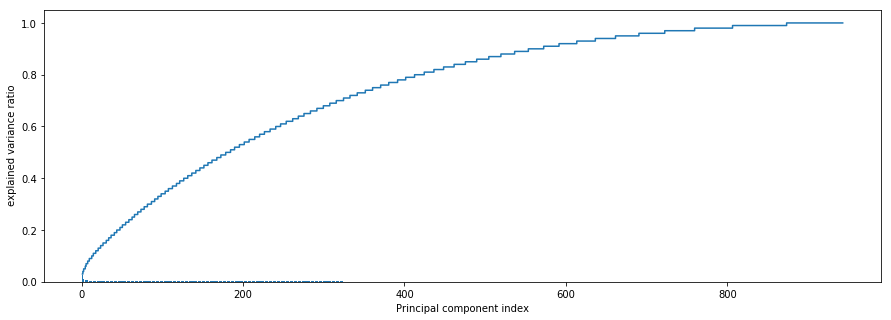

In [25]:
#plotting explained variance
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,5))
plt.bar(range(1,944),var_exp,align='center',label='individual explained variance')
plt.step(range(1,944),cum_var_exp,where='mid',label='cumulative explained variance')

plt.xlabel('Principal component index')
plt.ylabel(' explained variance ratio')

plt.show()

In [26]:
for i,j in enumerate(cum_var_exp):
    if j==0.9000:
        print('DIMENSION:',i,'\nCUMULATIVE VARIANCE EXPLAINED:',j)
        break

DIMENSION: 553 
CUMULATIVE VARIANCE EXPLAINED: 0.9


# 90% of variance is explained with 553 dimensional representation of user and movie vector


In [48]:
# Dropping from 943 dimensional vector to 553 dimensional vector for 'user_id'
U=np.delete(U,[range(553,943)],axis=1)
U.shape

(943, 553)

In [49]:
# Dropping from 943 dimensional vector to 553 dimensional vector for 'movie_id'
V=VT.T
V=np.delete(V,[range(553,943)],axis=1)
V.shape

(1681, 553)

In [50]:
# Initializing Scalar bias term(b) for user
b=np.random.normal(size=943)
max(b)

3.055390497086696

In [51]:
# Initializing Scalar bias term(c) for movie
c=np.random.normal(size=1681)
max(c)

3.205951571882361

In [52]:
# Visualizing "c"
c

array([ 0.00720185,  0.45360071,  0.28858133, ...,  2.06997002,
       -2.51893516,  0.51847595])

In [53]:
# Meaning of the ratings 
mu=data['rating'].mean()
mu

3.529480398257623

In [54]:
from tqdm import tqdm
alpha=0.001
lr=0.001
loss_list=[]
# computing loss and updating 'b' and 'c' for each epoch
for q in tqdm(range(30)):
    #Computing the loss
    rhs_loss=0
    for e,f,g in zip(user_data,item_data,ratings):
        rhs_loss+=(g-mu-b[e]-c[f]-np.dot(U[e].T,V[f]))**2
    rhs_loss=rhs_loss/len(data)
    lhs_loss=alpha*(np.sum(V**2)+np.sum(U**2)+np.sum(b**2)+np.sum(c**2))
    loss=lhs_loss+rhs_loss
    loss_list.append(loss)
    
    # Updating b and c
    for e,f,g in zip(user_data,item_data,ratings):
        d=((-2)*(g-mu-b[e]-c[f]-np.dot(U[e].T,V[f])))
        h=d+(alpha*2*b[e])
        b[e]=b[e]-lr*h
        w=d+(alpha*2*c[e])
        c[e]=c[e]-lr*h
    

100%|██████████████████████████████████████████| 30/30 [02:14<00:00,  4.39s/it]


In [55]:
# Printing the loss in each epoch
loss_list

[7.0250289886907655,
 6.3234399975375,
 6.101830713511799,
 6.041240032687918,
 6.042818548751073,
 6.070490424810114,
 6.109502161314271,
 6.153296210503557,
 6.198768114970365,
 6.2443754610991355,
 6.289324214874535,
 6.333196675485199,
 6.375772632512389,
 6.416939671537555,
 6.45664647945101,
 6.494877681351593,
 6.531639812002723,
 6.566953212455406,
 6.600847165543959,
 6.633356850528676,
 6.664521350100669,
 6.694382287147403,
 6.7229828535355285,
 6.750367094069288,
 6.776579364672774,
 6.80166391526004,
 6.8256645657046136,
 6.848624453783282,
 6.8705858402357585,
 6.891589959963094]

# Predicting the RATINGS

In [97]:
y_pred=np.zeros(89992)
count=0
for i in range(89992):
    e=data['user_id'][i]
    f=data['item_id'][i]
    y_pred[i]=mu+b[e]+c[f]+np.dot(U[e].T,V[f])
   
    

# Comparing PREDICTED RATINGS with ORIGINAL RATINGS

In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(data['rating'],y_pred)

0.7643827479

In [95]:
y_pred=np.round(y_pred,1)

In [96]:
y_pred[100]

4.0

In [69]:
data['rating'][100]

4

# The mean squared ERROR is 0.76,  which shows that the PREDICTION is GOOD

# <center> TASK 2

# The objective is to predict 'gender' of user based on the user vector generated in the SVD

In [426]:
# Reading the dataset
df = pd.read_csv('user_info.csv')
df.head(3)

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3


In [433]:
y=df['is_male']
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(U, y, test_size=0.25, stratify=y)

In [434]:
# Decision tree classifier to classifiy 'male' and 'female' gender
from  sklearn.tree import DecisionTreeClassifier as dt
dt=dt(min_samples_split=5,min_samples_leaf=5,class_weight='balanced')
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [443]:
from sklearn.metrics import accuracy_score  
male_pred=dt.predict(X_test)
acc = accuracy_score(y_test, male_pred)
acc

0.6398305084745762

# Classfication Report

In [439]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test ,male_pred))

              precision    recall  f1-score   support

           0       0.40      0.47      0.43        68
           1       0.77      0.71      0.74       168

    accuracy                           0.64       236
   macro avg       0.58      0.59      0.58       236
weighted avg       0.66      0.64      0.65       236



# F1 Score(0.74) is good, so our decision tree model is well trained

# Tree Visualization

C:\Users\lenovo\Downloads\anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


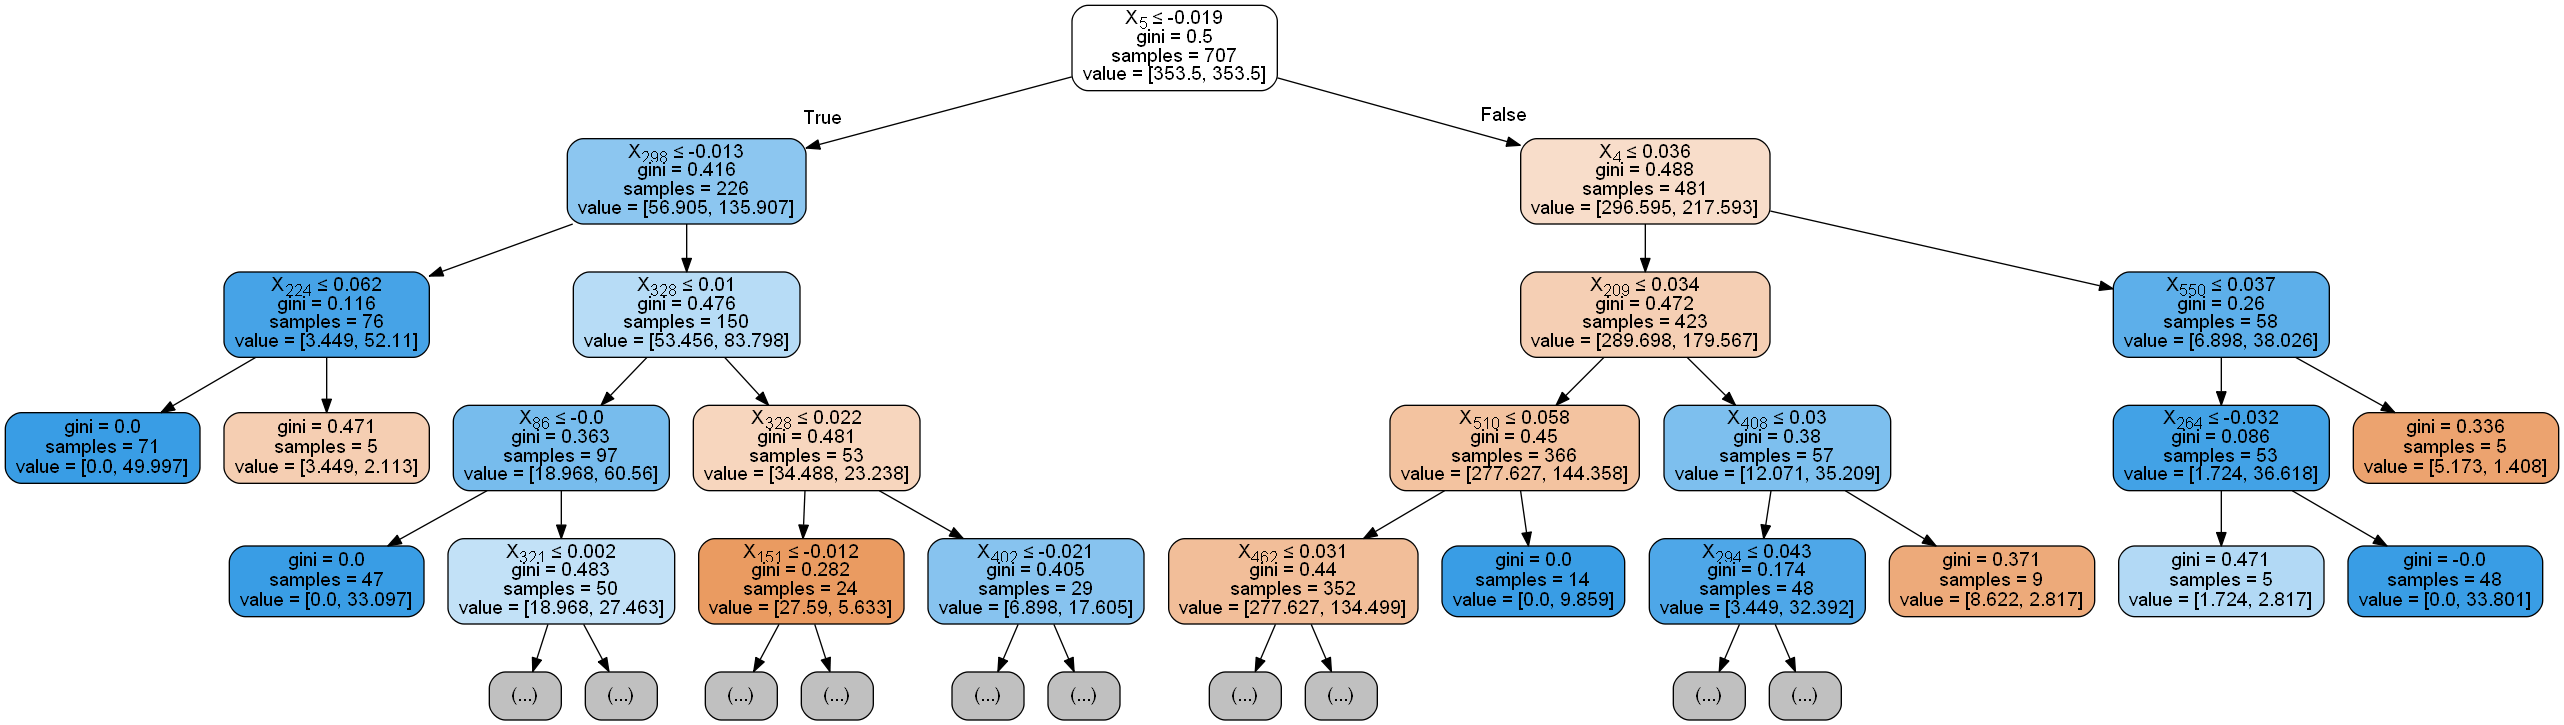

In [444]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, special_characters=True,max_depth=4)
                
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Conclusion
# The test accuracy score of 64% shows that, the optimized features vectors of users help to predict , GENDER of the USERS 